# Task 1: Web Scraping to Gain Company Insights

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data.
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page.
    response = requests.get(url)

    # Parse content.
    content = response.content
    parsed_content = BeautifulSoup(content, "html.parser")
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:

df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Appalling service with fai...
1,✅ Trip Verified | British Airways charge you f...
2,✅ Trip Verified | What is wrong with you guys?...
3,✅ Trip Verified | We booked two business cla...
4,✅ Trip Verified | I’ve flown with many airline...


In [4]:
if not os.path.exists(os.path.join(os.getcwd(), "data")):
    os.mkdir("data")

df.to_csv("data/BA_reviews_raw.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## Analysing Sentiments with Rule-Based Approach

This is the traditional way to do sentiment analysis based on a set of manually-created rules. This approach includes NLP techniques like lexicons (lists of words), stemming, tokenization and parsing.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet. We will be using VADER approach for this notebook.

### Step 1: Data Cleaning

We will clean the data to remove the "<b>✅ Trip Verified</b>" text, then convert the text into lower-case, and remove all the punctuation marks from the data. This is essential as punctuation marks do not add any meaningful value for the analysis.

In [5]:
df["reviews"] = df["reviews"].str.split("|", expand=True)[1]
df.head()

,reviews
0,Appalling service with failing defective fl...
1,British Airways charge you for the pleasure o...
2,What is wrong with you guys? People pay lots ...
3,We booked two business class seat with Brit...
4,"I’ve flown with many airlines, but my recent ..."


In [6]:
import string

def case_and_punctuation_handling(text):
    lower_case_text = text.lower()
    cleaned_text = lower_case_text.translate(str.maketrans("", "", string.punctuation))
    return cleaned_text

df["cleaned_reviews"] = df["reviews"].apply(case_and_punctuation_handling)
df.head()

,reviews,cleaned_reviews
0,Appalling service with failing defective fl...,appalling service with failing defective fl...
1,British Airways charge you for the pleasure o...,british airways charge you for the pleasure o...
2,What is wrong with you guys? People pay lots ...,what is wrong with you guys people pay lots o...
3,We booked two business class seat with Brit...,we booked two business class seat with brit...
4,"I’ve flown with many airlines, but my recent ...",i’ve flown with many airlines but my recent e...


### Step 2: Tokenization, Stopwords removal, and POS-tagging

1) Tokenization breaks text(or sentences, in our case) into smaller parts(or individual words) for easier machine analysis, helping machines understand human language. Tokenization, in the realm of Natural Language Processing (NLP) and machine learning, refers to the process of converting a sequence of text into smaller parts, known as tokens. So here, we will tokenize our text data to convert it into smaller tokens(or words).

2) Stopwords are a set of commonly used words in a language. Examples of stop words in English are "a", "the", "is", "are", etc. Stopwords are commonly used in Natural Language Processing (NLP) to eliminate words that are so widely used that carry very little useful information. We will remove such stopwords from our data going forward.

3) Part-of-speech (POS) tagging is fundamental in natural language processing (NLP) and it involves labelling words in a sentence with their corresponding POS tags having form (word, tag). POS tags indicate the grammatical category of a word, such as noun, verb, adjective, adverb, etc. The goal of POS tagging is to determine a sentence’s syntactic structure and identify each word’s role in the sentence. POS tagging is essential to preserve the context of the word and is essential for Lemmatization.

In [8]:
import nltk

# Downloading all nltk packages to avoid compatibility issues.
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> u

Nothing to update.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [21]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [18]:
# POS tagging dictionary.
pos_dict = {"J":wordnet.ADJ, "V":wordnet.VERB, "N":wordnet.NOUN, "R":wordnet.ADV}

def handle_tokenization_stopwords_postags(text):
    # Tokenization.
    tokenized_text = word_tokenize(text)
    # POS-tagging.
    tags = pos_tag(tokenized_text)
    new_text_list = []
    for word, tag in tags:
        # Stopword removal.
        if word not in stopwords.words("english"):
          new_text_list.append(tuple([word, pos_dict.get(tag[0])]))
    return new_text_list

df["POS_tagged_reviews"] = df["cleaned_reviews"].apply(handle_tokenization_stopwords_postags)
df.head()

,reviews,cleaned_reviews,POS_tagged_reviews
0,Appalling service with failing defective fl...,appalling service with failing defective fl...,"[(appalling, v), (service, n), (failing, v), (..."
1,British Airways charge you for the pleasure o...,british airways charge you for the pleasure o...,"[(british, a), (airways, n), (charge, v), (ple..."
2,What is wrong with you guys? People pay lots ...,what is wrong with you guys people pay lots o...,"[(wrong, a), (guys, v), (people, n), (pay, v),..."
3,We booked two business class seat with Brit...,we booked two business class seat with brit...,"[(booked, v), (two, None), (business, n), (cla..."
4,"I’ve flown with many airlines, but my recent ...",i’ve flown with many airlines but my recent e...,"[(’, v), (flown, v), (many, a), (airlines, n),..."


### Step 3: Lemmatization

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item, generally known as stem. A stem is responsible for the word's lexical meaning. The two popular techniques of obtaining the stem words are Stemming and Lemmatization.
   
We will use the Lemmatization process here as Stemming often gives some meaningless root words as it simply chops off some characters in the end, whereas, Lemmatization gives meaningful root words. It is important to note that, lemmatization requires POS tagging of the words, which we have already accomplished in the previous step.

In [19]:
# Obtaining stem-words with Lemmatization.
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def text_lemmatization(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df["lemmatized_reviews"] = df["POS_tagged_reviews"].apply(text_lemmatization)
df.head()

,reviews,cleaned_reviews,POS_tagged_reviews,lemmatized_reviews
0,Appalling service with failing defective fl...,appalling service with failing defective fl...,"[(appalling, v), (service, n), (failing, v), (...",appal service fail defective fleet a380 airc...
1,British Airways charge you for the pleasure o...,british airways charge you for the pleasure o...,"[(british, a), (airways, n), (charge, v), (ple...",british airway charge pleasure choose seat p...
2,What is wrong with you guys? People pay lots ...,what is wrong with you guys people pay lots o...,"[(wrong, a), (guys, v), (people, n), (pay, v),...",wrong guy people pay lot money business clas...
3,We booked two business class seat with Brit...,we booked two business class seat with brit...,"[(booked, v), (two, None), (business, n), (cla...",book two business class seat british airway ...
4,"I’ve flown with many airlines, but my recent ...",i’ve flown with many airlines but my recent e...,"[(’, v), (flown, v), (many, a), (airlines, n),...",’ fly many airline recent experience british...


### Step 4: Sentiment Analysis (VADER)
  
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a rule-based sentiment analyzer that has been trained on social media text. Here, SentimentIntensityAnalyzer() is an object and polarity_scores is a method which will  give us scores of the following categories:

- Positive
- Negative
- Neutral
- Compound
   
The compound score is the sum of positive, negative & neutral scores which is then normalized between -1(most extreme negative) and +1 (most extreme positive). The more Compound score closer to +1, the higher the positivity of the text. For our Analyser, we will consider compound score of >=0.5 as positive, and compund score of <0 as negative.

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vader_analysis(sentiment_text):
    score = analyzer.polarity_scores(sentiment_text)
    return score["compound"]

df["VADER_compound_score"] = df["lemmatized_reviews"].apply(vader_analysis)

# function to analyse
def sentiment_classifier(compound_score):
    if compound_score >= 0.5:
        return "Positive"
    elif compound_score < 0 :
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["VADER_compound_score"].apply(sentiment_classifier)
df.head()

,reviews,cleaned_reviews,POS_tagged_reviews,lemmatized_reviews,VADER_compound_score,Sentiment
0,Appalling service with failing defective fl...,appalling service with failing defective fl...,"[(appalling, v), (service, n), (failing, v), (...",appal service fail defective fleet a380 airc...,-0.8360,Negative
1,British Airways charge you for the pleasure o...,british airways charge you for the pleasure o...,"[(british, a), (airways, n), (charge, v), (ple...",british airway charge pleasure choose seat p...,0.9730,Positive
2,What is wrong with you guys? People pay lots ...,what is wrong with you guys people pay lots o...,"[(wrong, a), (guys, v), (people, n), (pay, v),...",wrong guy people pay lot money business clas...,-0.8644,Negative
3,We booked two business class seat with Brit...,we booked two business class seat with brit...,"[(booked, v), (two, None), (business, n), (cla...",book two business class seat british airway ...,-0.8957,Negative
4,"I’ve flown with many airlines, but my recent ...",i’ve flown with many airlines but my recent e...,"[(’, v), (flown, v), (many, a), (airlines, n),...",’ fly many airline recent experience british...,0.9301,Positive


In [23]:
sentiment_counts = df["Sentiment"].value_counts()
sentiment_counts

,count
Sentiment,
Positive,456
Negative,441
Neutral,103


In [24]:
df.to_csv("data/BA_reviews_analysed.csv")

## Data Vizualization: Pie-Chart

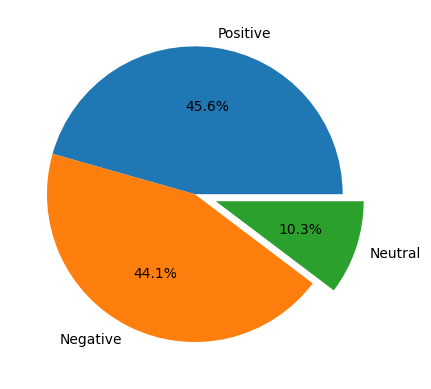

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Declaring data.
data = sentiment_counts.values

# Define Seaborn color palette to use.
palette_color = sns.color_palette()

# Plotting data on chart.
plt.pie(data, labels=sentiment_counts.index, colors=palette_color, explode = (0, 0, 0.15), autopct="%.1f%%")

# Displaying chart.
plt.show()

## Data Vizualization: Word Cloud

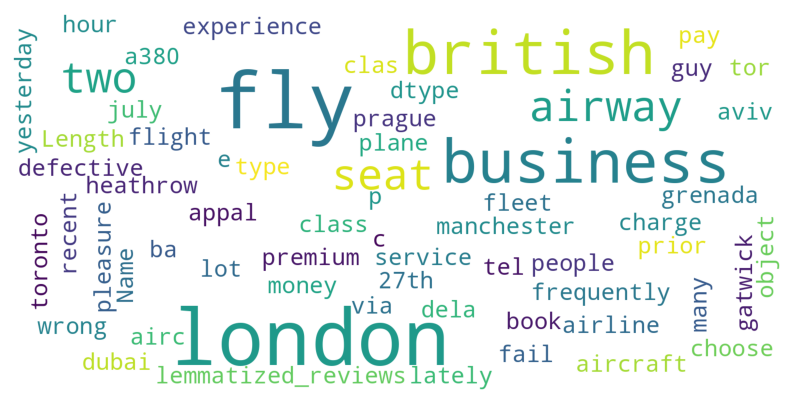

In [26]:
from wordcloud import WordCloud

def vizualize_wordcloud(data):
    wordcloud = WordCloud(background_color="white", max_words=200, max_font_size=40, scale=4, relative_scaling=0.9, random_state=7)
    wordcloud = wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(10, 10))
    plt.axis("off")

    plt.imshow(wordcloud)
    plt.show()

vizualize_wordcloud(df["lemmatized_reviews"])

## References:

1) https://analyticsindiamag.com/sentiment-analysis-made-easy-using-vader/   
2) https://www.geeksforgeeks.org/python-lemmatization-with-nltk/   
3) https://www.kaggle.com/code/mchirico/quick-look-seaborn-wordcloud   
4) https://www.analyticsvidhya.com/blog/2022/07/sentiment-analysis-using-python/#h-using-vader   
5) https://pypi.org/project/beautifulsoup4/   
6) https://www.airlinequality.com/airline-reviews/british-airways   